In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [ ]:
#################################page수 따로 입력해야됩니다#####################################
page = 200
#################################################################################################
article_url = []
for i in range(1, page+1):
    ##############url 바꿔가면서 하면 됩니다##################
    url = "https://www.newswire.co.kr/?md=A01&cat=1200&page="
    ##########################################################
    URL = url + str(i)
 
    response = requests.get(URL)    
    html = response.text                                   
    soup = BeautifulSoup(html, 'html.parser')           
    print(i)
    
    for url in soup.select('div.news > h5 > a'):
        article_url.append(url.attrs['href'])                                       

In [ ]:
result = pd.DataFrame()   
for url in article_url:
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    title = soup.find('h1')
    content = soup.select('section.release-story > p')
    df = pd.DataFrame({ 'title' : [title.text],
                        'contents' : [content[0].text]
                      })
    result = pd.concat([result, df])
    result.index = np.arange(len(result))

In [ ]:
print(result.shape)
result.head()

(5000, 2)


,title,contents
0,Kodak Moments Announces New 120 Format Gold 20...,"\n\t\t\t\t\t\t\t\t\t\tROCHESTER, N.Y.--(Busine..."
1,"코닥 모멘트, 120포맷으로 구성한 골드 200 필름 출시","\n\t\t\t\t\t\t\t\t\t\t로체스터, 뉴욕--(Business Wire..."
2,"도서출판 문학공원, 조혜숙 시인 두 번째 시집 ‘191002 브리즈번’ 펴내",\n\t\t\t\t\t\t\t\t\t\t서울--(뉴스와이어) 2022년 03월 21...
3,"다락원 원큐패스, 위험물산업기사 실기 인강 무료 제공",\n\t\t\t\t\t\t\t\t\t\t서울--(뉴스와이어) 2022년 03월 21...
4,"한국장애예술인협회 방귀희 대표, ‘장애인 인식론’ 출간",\n\t\t\t\t\t\t\t\t\t\t서울--(뉴스와이어) 2022년 03월 21...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = result
df['label']='커뮤니케이션서비스'
df.to_csv('/content/drive/MyDrive/빅데이터 핀테크 전문가/딥러닝 프로젝트/crawling_culture.csv', index = False, encoding = 'utf-8-sig')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/빅데이터 핀테크 전문가/딥러닝 프로젝트/data/crawling_culture.csv',encoding = 'utf-8-sig')

In [ ]:
import re

#공백 제거
def remove_white_space(text):
    text = re.sub(r'[\t\r\n\f\v]', ' ', str(text))
    return text
#특수 문자 제거
def remove_special_char(text):
    text = re.sub('[^ ㄱ-ㅣ가-힣 0-9]+', ' ', str(text))
    return text

df.title = df.title.apply(remove_white_space)
df.title = df.title.apply(remove_special_char)

df.contents = df.contents.apply(remove_white_space)
df.contents = df.contents.apply(remove_special_char)

In [ ]:
df.head()

,title,contents,label
0,120 200,21 2022 ...,커뮤니케이션서비스
1,코닥 모멘트 120포맷으로 구성한 골드 200 필름 출시,로체스터 뉴욕 뉴스와이어 2022년 03월 21일 ...,커뮤니케이션서비스
2,도서출판 문학공원 조혜숙 시인 두 번째 시집 191002 브리즈번 펴내,서울 뉴스와이어 2022년 03월 21일 도서출판 문학공...,커뮤니케이션서비스
3,다락원 원큐패스 위험물산업기사 실기 인강 무료 제공,서울 뉴스와이어 2022년 03월 21일 다락원 원큐패스...,커뮤니케이션서비스
4,한국장애예술인협회 방귀희 대표 장애인 인식론 출간,서울 뉴스와이어 2022년 03월 21일 한국장애예술인협...,커뮤니케이션서비스


In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 1.3 MB/s 
     |████████████████████████████████| 448 kB 50.4 MB/s 


In [ ]:
from tqdm import tqdm
from konlpy.tag import Okt
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(df['contents']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 5000/5000 [05:43<00:00, 14.55it/s]


리뷰의 최대 길이 : 7593
리뷰의 평균 길이 : 415.0292


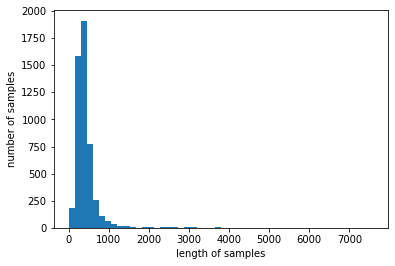

In [ ]:
import matplotlib.pyplot as plt
print('리뷰의 최대 길이 :',max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.wv.vectors.shape

(18526, 100)

In [ ]:
print(model.wv.most_similar("드라마"))

[('원작', 0.8033763766288757), ('영화', 0.7760338187217712), ('스릴러', 0.7690378427505493), ('넷플릭스', 0.767255425453186), ('코믹', 0.7659859657287598), ('애니메이션', 0.7653003931045532), ('블록버스터', 0.7585124969482422), ('액션', 0.7574235200881958), ('코미디', 0.7446563243865967), ('호러', 0.7401591539382935)]


#미디어

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/빅데이터 핀테크 전문가/딥러닝 프로젝트/data/crawling_media.csv',encoding = 'utf-8-sig')

In [ ]:
import re

#공백 제거
def remove_white_space(text):
    text = re.sub(r'[\t\r\n\f\v]', ' ', str(text))
    return text
#특수 문자 제거
def remove_special_char(text):
    text = re.sub('[^ ㄱ-ㅣ가-힣 0-9]+', ' ', str(text))
    return text

df.title = df.title.apply(remove_white_space)
df.title = df.title.apply(remove_special_char)

df.contents = df.contents.apply(remove_white_space)
df.contents = df.contents.apply(remove_special_char)

In [ ]:
df.head(15)

,title,contents,label
0,티젠소프트 청주시청 스마트 거리 공연 지원 플랫폼 사업에 동영상 솔루션 도입,서울 뉴스와이어 2022년 03월 21일 멀티미디어 동영...,커뮤니케이션서비스
1,노레이턴시 디파이 2 0 2 클레이다이스 와 전략적 파트너십 체결,버진아일랜드 뉴스와이어 2022년 03월 21일 클레이튼...,커뮤니케이션서비스
2,예스24 2022 스프링 플레이오프 진출 기념 이벤트 진행,서울 뉴스와이어 2022년 03월 21일 대한민국 대표 ...,커뮤니케이션서비스
3,장애인먼저실천운동본부 2021 모니터 보고서 장애인과 코로나19 출간,서울 뉴스와이어 2022년 03월 21일 장애인먼저실천운...,커뮤니케이션서비스
4,예스킨 에이클라 미디어 그룹과 브랜드 공동 사업 추진,인천 뉴스와이어 2022년 03월 21일 건강기능식품 및...,커뮤니케이션서비스
5,문피아 에이스토리와 제1회 크로스 드라마 극본 공모전 접수 시작,서울 뉴스와이어 2022년 03월 21일 웹소설 연재 플...,커뮤니케이션서비스
6,,18 2022 ...,커뮤니케이션서비스
7,징가 자회사 스타라크와 골프 라이벌 출시 4주년 기념,샌프란시스코 뉴스와이어 2022년 03월 18일 ...,커뮤니케이션서비스
8,네이티브엑스 콰이 포 비즈니스 공식 마케팅 파트너 지정,서울 뉴스와이어 2022년 03월 18일 네이티브엑스 가...,커뮤니케이션서비스
9,,17 2022 ...,커뮤니케이션서비스


In [ ]:
from tqdm import tqdm
from konlpy.tag import Okt
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()

tokenized_data = []
for sentence in tqdm(df['contents']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 2858/2858 [02:52<00:00, 16.56it/s]


최대 길이 : 3300
평균 길이 : 370.49475157452764


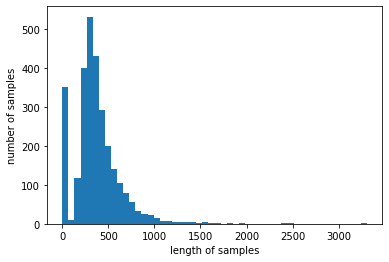

In [ ]:
import matplotlib.pyplot as plt
print('최대 길이 :',max(len(review) for review in tokenized_data))
print('평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()
***



In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
model.wv.vectors.shape

(10868, 100)

In [ ]:
print(model.wv.most_similar("게임"))

[('골프', 0.677523136138916), ('주얼', 0.6125411987304688), ('캐', 0.6112669110298157), ('하이퍼', 0.5975630879402161), ('프랜차이즈', 0.5836870074272156), ('콘솔', 0.5690044164657593), ('타이틀', 0.5623363256454468), ('캐럿', 0.5539954900741577), ('플레이', 0.5525661706924438), ('뮤', 0.5491297841072083)]
